# Import libraries

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# Import Data

In [4]:
#Set path

path = r"C:\Users\marce\Documents\Instacart Basket Analysis"

In [6]:
# Import ords_prods_merge_3.pkl

df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_3.pkl'))

In [3]:
df.count()

NameError: name 'df' is not defined

In [5]:
# Check the dimension of the imported df

df.shape

(32404161, 23)

In [10]:
# Change data type for order_id , user_id  , mean_prices to reduce the memory usage of df

df['order_id'] = df['order_id'].astype('int16')
df['user_id'] = df['user_id'].astype('int16')
df['mean_prices'] = df['mean_prices'].astype('float16')




In [12]:
# Check info for df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404161 entries, 0 to 32404858
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int16  
 1   user_id                 int16  
 2   order_number            int8   
 3   orders_day_of_week      int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float16
 6   product_id              float16
 7   add_to_cart_order       float16
 8   reordered               float16
 9   product_name            object 
 10  aisle_id                int8   
 11  department_id           int8   
 12  prices                  float16
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int8   
 18  loyalty_flag            object 
 19  mean_prices             float16
 20  spender_level           object 
 21  median_freq             float

### Creating Bar Charts



<Axes: >

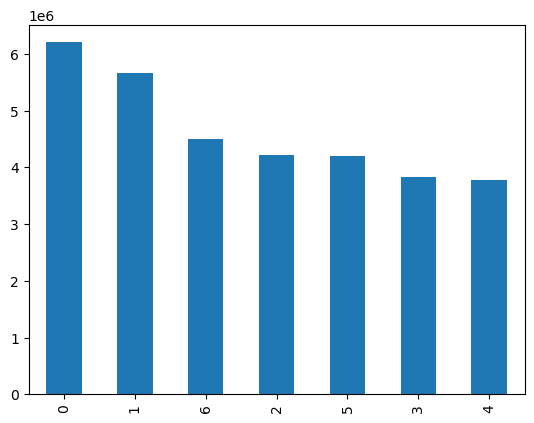

In [13]:
# Create bar chart for 'orders_day_of_week'

df['orders_day_of_week'].value_counts().plot.bar()

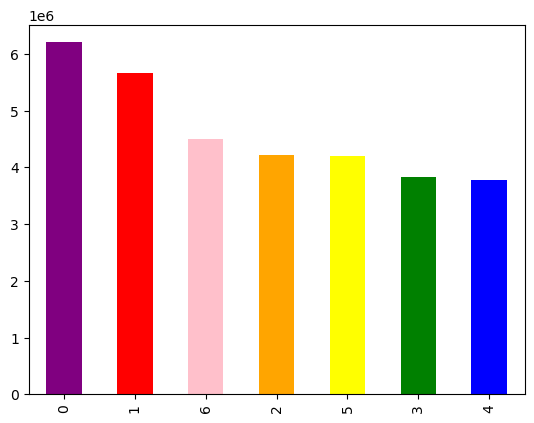

In [16]:
# Create bar chart for 'orders_day_of_week' with color argument

bar = df['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### Exporting Charts

In [17]:
# Export the bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Creating Histograms and Scatteplots

<Axes: ylabel='Frequency'>

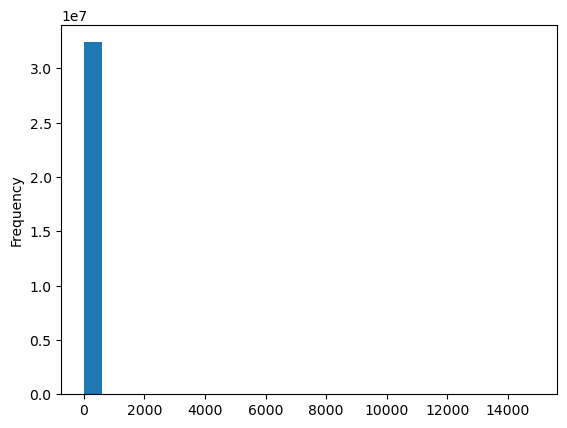

In [18]:
# Crearte a histogram of the 'prices' column

df['prices'].plot.hist(bins = 25)


<Axes: xlabel='prices', ylabel='prices'>

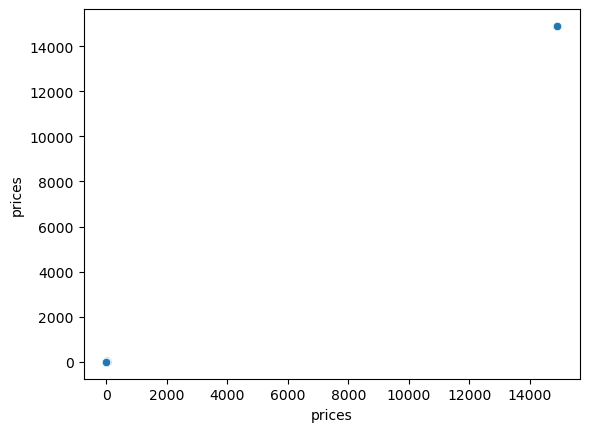

In [19]:
# Crearte a scaterplot of the 'prices' column

sns.scatterplot(x = 'prices', y = 'prices',data = df)




In [25]:
# Create a new df that include only 'prices' and 'user_id' columns
df_prices = df[['prices','user_id']]


In [26]:
# Check whether are any values above a certain threshhold in data

df_prices.loc[df_prices['prices']>100]

,prices,user_id
10030345,14896.0,17
10030346,14896.0,17
10030347,14896.0,135
10030348,14896.0,135
10030349,14896.0,342
...,...,...
10034769,14896.0,9042
10034770,14896.0,9210
10034771,14896.0,9210
10034772,14896.0,9441


In [28]:
# Mark the values for prices>100 as missing (NaNs)
df.loc[df['prices'] >100, 'prices'] = np.nan

In [29]:
df['prices'].max()

25.0

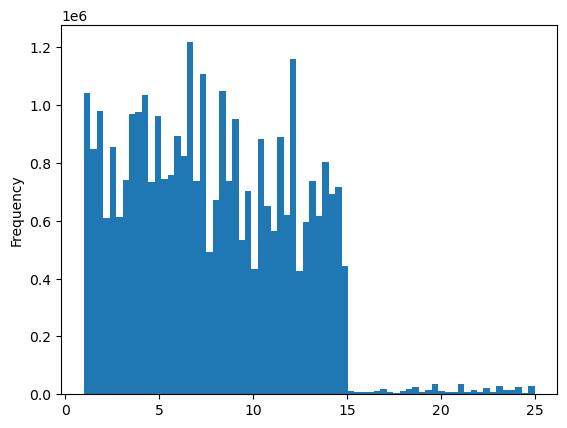

In [31]:
# Create histogram of the 'prices' column

hist= df['prices'].plot.hist(bins=70)


In [32]:
# Export the histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# Creating Line Charts

### Sampling Data

In [33]:
# Create a list holding Frue/False values to the test np.random.rand() <= 0.7 with random number(seed) '4'

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [34]:
dev

array([False,  True, False, ...,  True,  True, False])

In [36]:
np.random.rand(10)


array([0.81786511, 0.20691209, 0.46877994, 0.64491806, 0.17090853,
       0.00833434, 0.18474633, 0.63848856, 0.5795878 , 0.44592973])

In [38]:
len(df)

32404161

In [39]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [40]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

In [41]:
len(df)

32404161

In [42]:
len(big) + len (small)

32404161

In [43]:
# Create  a new dataframe that contains only the 'prices' and 'orders_days_of_week' columns from the small subset

df_2= small[['orders_day_of_week','prices']]

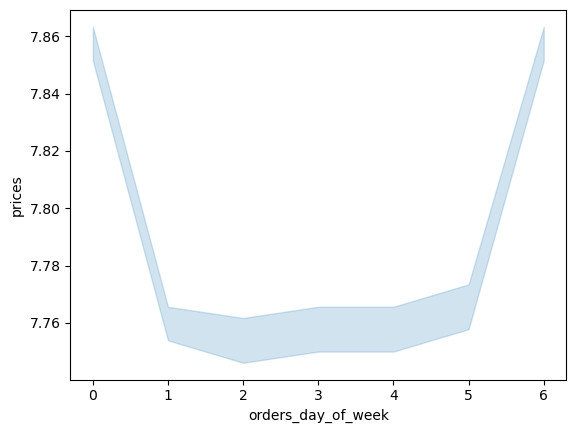

In [44]:
# Create the Line Chart

line = sns.lineplot(data = df_2, x ='orders_day_of_week',y = 'prices' )

In [47]:
# Export the line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_ds_pr.png'))
